In [14]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
%matplotlib inline

In [15]:
cd g:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy

g:\My Drive\Colab Notebooks\DAV Assessment\cefas_smartBuoy


In [16]:
df = pd.read_csv('clean_ext_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df.drop('kd', axis = 1)
df = df.dropna()

phase_0 = df.loc[df['phase'] == 0, :].copy()
X = phase_0.drop(['fluors', 'phase'], axis = 1).copy()
y = phase_0['fluors'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# standardize the data
scaler = StandardScaler()
#train the scaler on the training data
X_train = scaler.fit_transform(X_train)
#apply the scaler to the test data sets
X_test = scaler.transform(X_test)
X = scaler.transform(X)

phase_1 = df.loc[df['phase'] > 0, :].copy()
X_1 = phase_1.drop(['fluors', 'phase'], axis = 1).copy()
y_1 = phase_1.loc[:, 'fluors'].copy()
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)


In [17]:
model = keras.models.load_model('model.h5')

In [18]:
pred_train = model.predict(X_train)
print(f'Training RMS error: {np.sqrt(mean_squared_error(y_train, pred_train))}')
pred_test = model.predict(X_test)
print(f'Test RMS error {np.sqrt(mean_squared_error(y_test, pred_test))}')
fluors_pred = model.predict(X)
print(f'Overall pre-construcion RMS error: {np.sqrt(mean_squared_error(y, fluors_pred))}')
fluors_pred_1 = model.predict(X_1)
print(f'Overall post-construciton RMS error {np.sqrt(mean_squared_error(y_1, fluors_pred_1))}')

phase_0.loc[:, 'fluors_pred'] = fluors_pred
phase_1.loc[:, 'fluors_pred'] = fluors_pred_1

#phase_0.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_0_predictions.csv', index = 'false', sep = ',')
#phase_1.drop(['sal', 'ftu', 'surf_temp', 'phase', 'direct_solar'], axis = 1).to_csv('phase_1_predictions.csv', index = 'false', sep = ',')


940/940 [==============================] - 5s 5ms/step
Training RMS error: 1.2100784290701962
403/403 [==============================] - 2s 5ms/step
Test RMS error 1.223598587879156
1343/1343 [==============================] - 7s 5ms/step
Overall pre-construcion RMS error: 1.2141503794769133
1904/1904 [==============================] - 9s 5ms/step
Overall post-construciton RMS error 1.4048342245773044


C:\Users\Reuben\AppData\Local\Temp\ipykernel_7076\1370620441.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


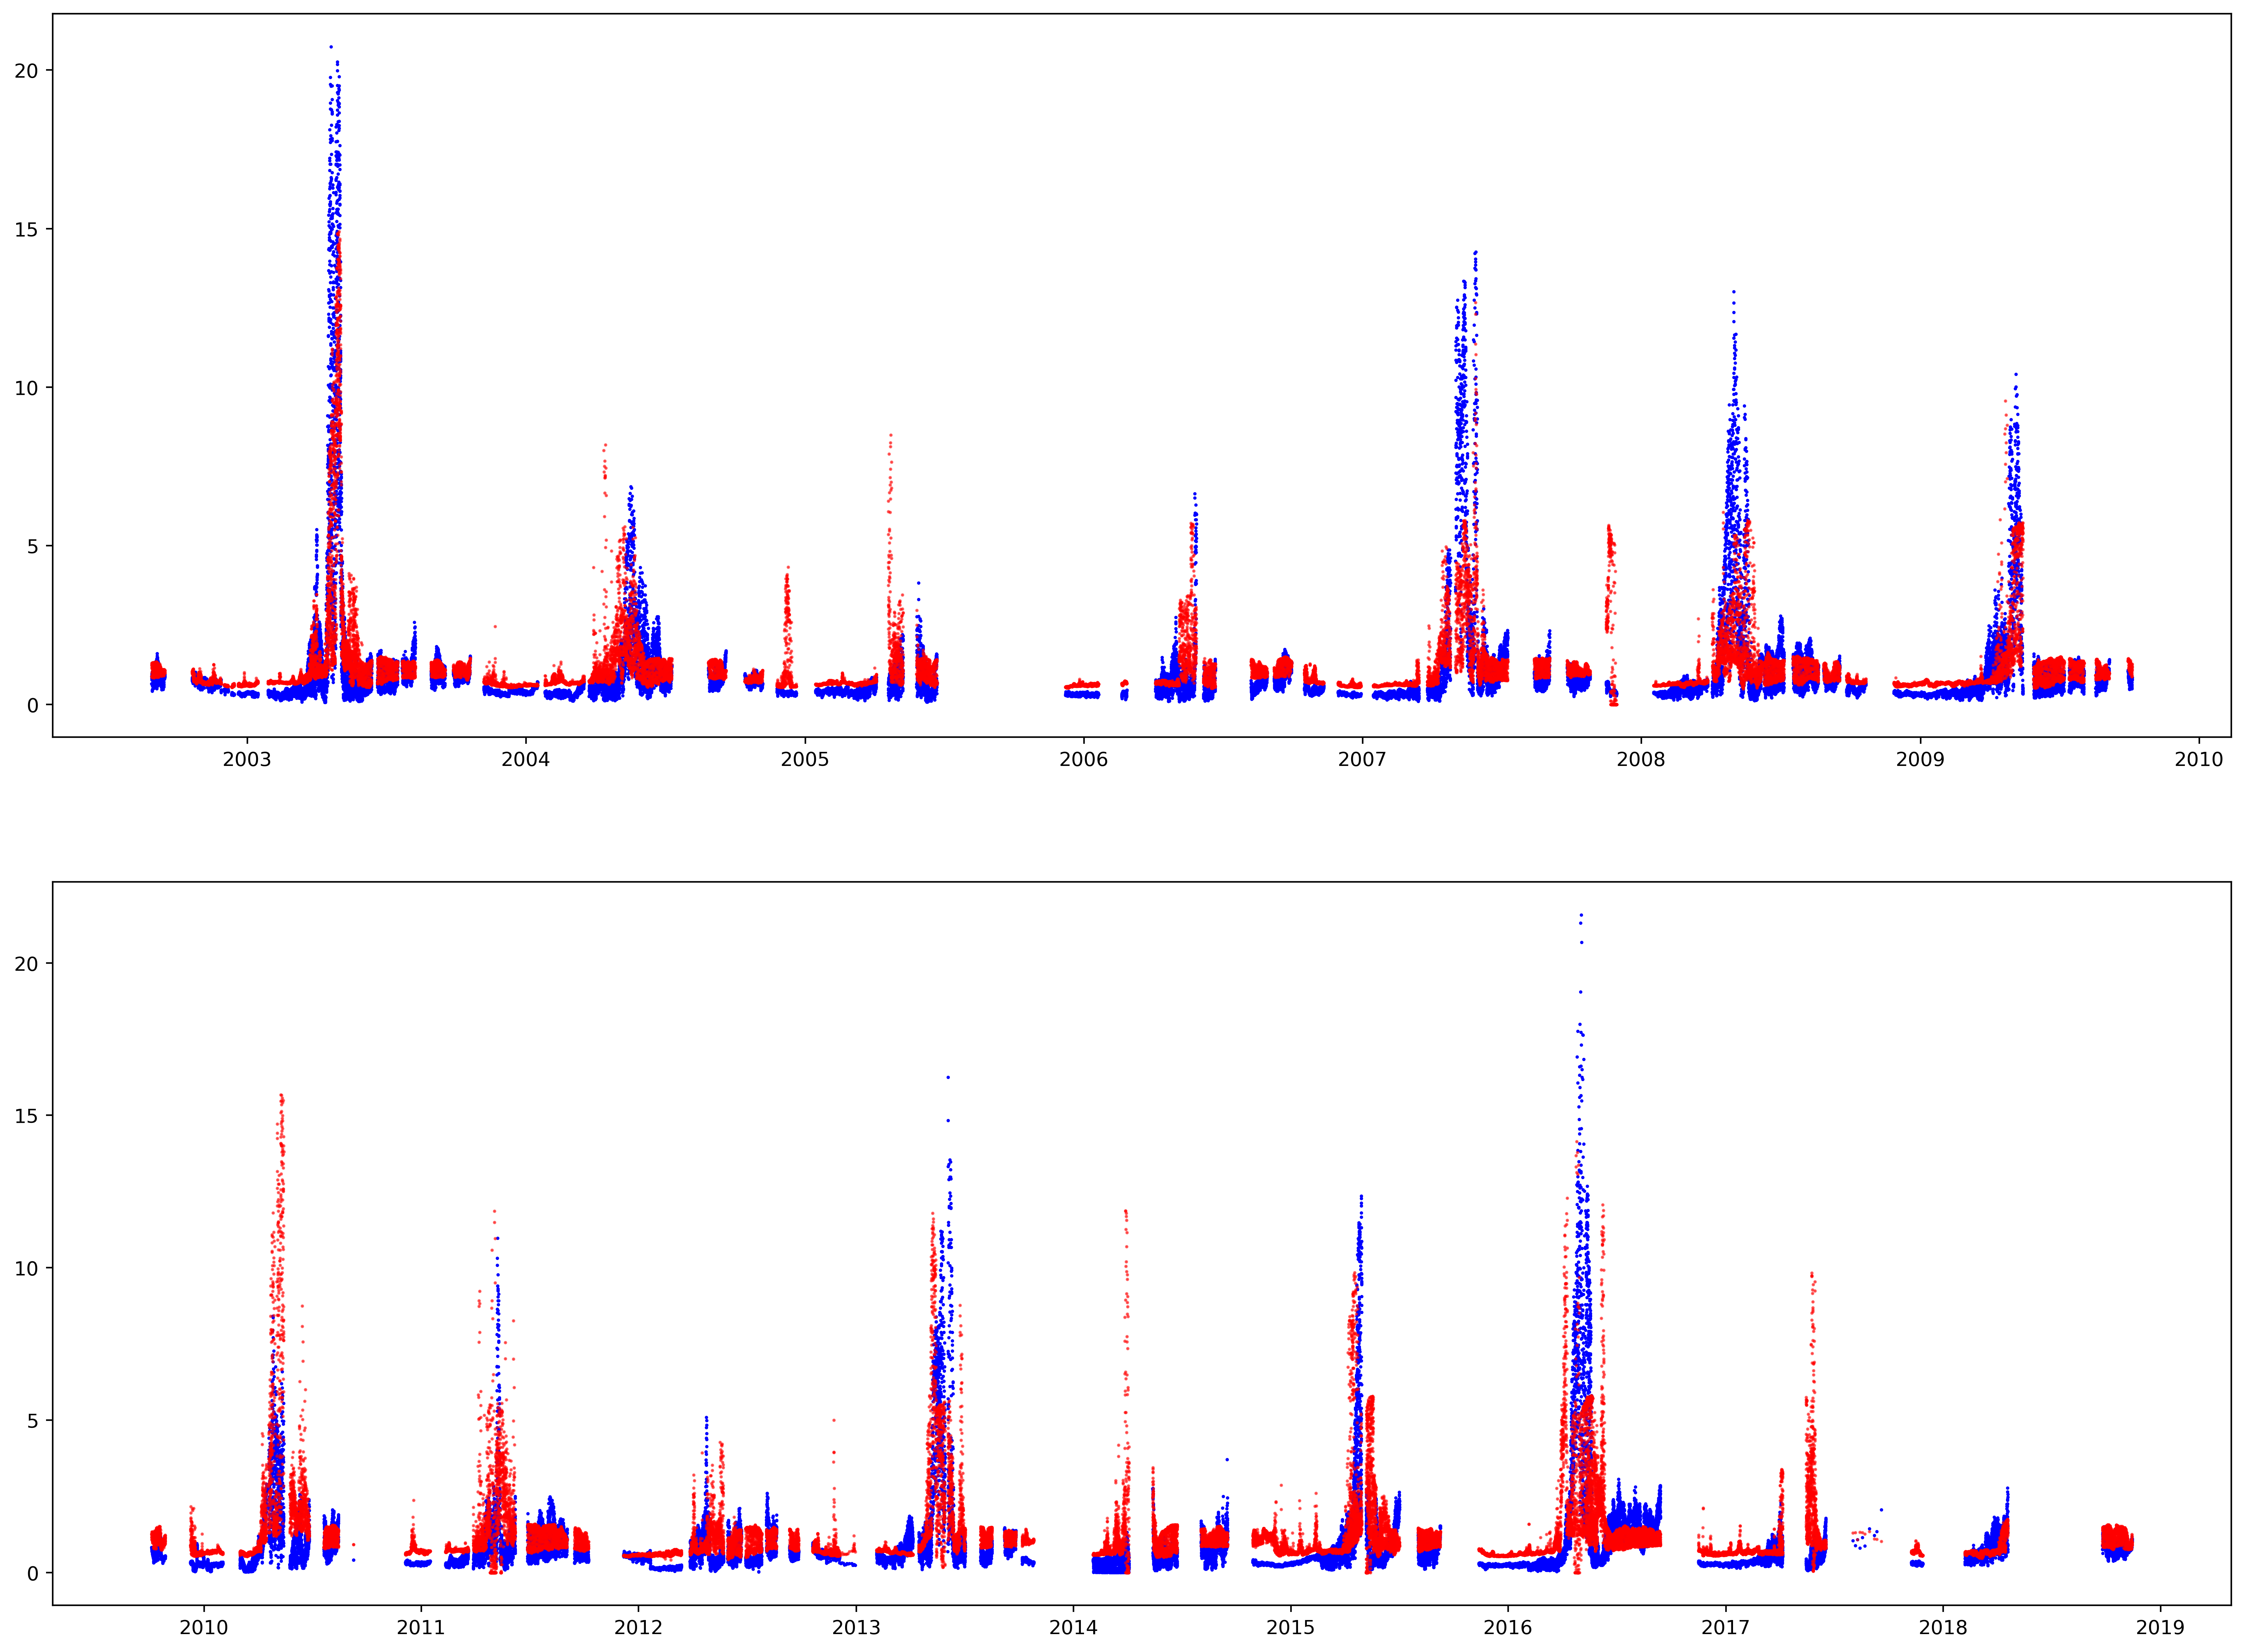

In [24]:
fig, ax = plt.subplots(2,1, figsize = (20, 15), dpi = 400)
ax[0].scatter(phase_0.index, phase_0['fluors'], s = 0.5, color = 'blue')
ax[0].scatter(phase_0.index, phase_0['fluors_pred'], s = 0.5, color = 'red', alpha = 0.6)
ax[1].scatter(phase_1.index, phase_1['fluors'], s = 0.5, color = 'blue')
ax[1].scatter(phase_1.index, phase_1['fluors_pred'], s = 0.5, color = 'red', alpha = 0.6)
fig.savefig('model_predictions.png', dpi = 400)
fig.show()